<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de integrales por el método de Monte Carlo

Consiedramos aquí la estimación de integrales unidimensionales

 $I = \int_a^b g(x)dx,$

Suponiendo que:

$0 \leq g(x) \leq c$

 $a \leq x \leq b$

## Método de acierto y error

Sea $(X, Y)$ un vector aleatorio uniformemente distribuido sobre el rectangulo con base $(b-a)$ y altura $c$ con función densidad de probabilidad :


$U(0,1)$

Implica:

$P(X_1,Y_1)=P(X_2,Y_2)......=P(X_n,Y_n)=\frac{1}{b-a}$

Se define:

$\Omega = $$ [$$ {(x,y)|{(x,y) \in c(b-a)}}$ $] =$ rectangulo con base $(b-a)$ y altura $c$

$S = $$ [$$ {(x,y)| y \leq g(x)}$ $] =$  área bajo la curva $g(x)$



La probabilidad de que $(x,y)$ caiga bajo la curva $g(x)$ es:

$$p = \frac{S}{ \Omega} = \frac{\int_a^b g(x)dx}{c(b-a)} = \frac{I}{c(b-a)}$$

Si generamos $n$ vectores aleatorios independientes $(X_1, Y_1)$, $(X_2, Y_2)$, ..., $(X_n, Y_n)$, $p$ puede ser estimado por:

$\hat{p} = \frac{n_A}{n}$,

Donde:

 $n_A = $ número de puntos tal que se cumple que:
  
   $$y \leq g(x)$$

 $n =$ numero total de puntos generados (en el algoritmo, $n =$ tamaño de muestra)


Se define el estimador $\hat{\theta_1}$ como la aproximacion del parametro  $ I$ ($ I\approx \hat{\theta_1}$):


$\hat{\theta_1} = [c(b-a)]\hat{p} = c(b-a)\frac{n_A}{n} $

Tambien:

$μ_\hat{\theta_1}= \mathbb{E}[(\hat{\theta_1})]= I$


Como ejemplo, calculemos una integral no soluble por métodos analíticos:
    
$\int_0^1 \sqrt( \arctan x ) dx$

Primero, definimos y graficamos la función de prueba:

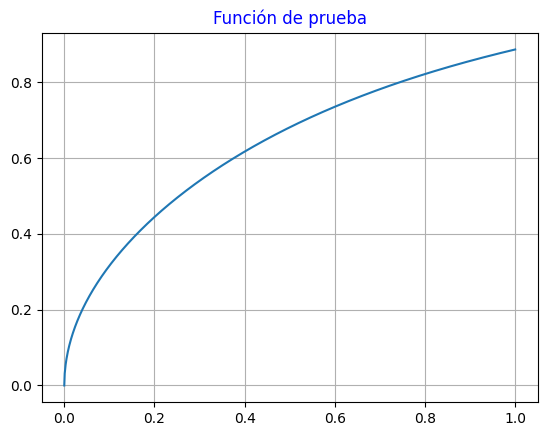

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#Definimos la función de prueba.
def test_function(x):
    return(np.sqrt(np.arctan(x)))

#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.plot(X, test_function(X))
plt.show()




Observemos que la función es continua y monotona creciente, lo cual nos asegura que está acotada en $[0,1]$, es decir,
podemos dibujarla completa dentro de un rectángulo.

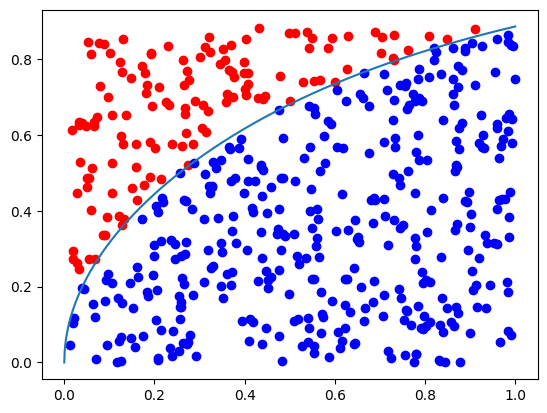

In [ ]:
def integrate(x1,x2,func=test_function,n=100000):
    X=np.linspace(x1,x2,1000) # x ∈ [x1,x2]
    y1=0 # y ∈ [y1 = 0,y2 = max(func(X))]
    y2=max((func(X)))
    area=(x2-x1)*(y2-y1)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(x1,x2,1) # n=1, generara una muestra por cada iteracion
        xs.append(x)
        y=np.random.uniform(y1,y2,1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0: # |y| >= |g(x)|, el valor para la cordenada y esta por encima de la grafica de g(x) o  y ∉ [y1 = 0,y2 = max(func(X))]
            check.append(0) #el punto no se cuenta, se suma un "0" al arreglo "check"
        else:
            check.append(1) # |y| <= |g(x)|, el valor esta por debajo de la curva g(x), se cuenta el punto y se suma un "1" al arreglo "check"
    return(np.mean(check)*area,xs,ys,check)




X=np.linspace(0,1,1000)
plt.plot(X,test_function(X))
plt.scatter(df[df['c']==0]['x'],df[df['c']==0]['y'],color='red')
plt.scatter(df[df['c']==1]['x'],df[df['c']==1]['y'],color='blue')
plt.show()